# DQN Reinforcement Learning in Atari Games

A DQN, or Deep Q-Network, approximates a state-value function in a Q-Learning framework with a neural network. In the Atari Games case, they take in several frames of the game as an input and output state values for each action as an output.

It is usually used in conjunction with Experience Replay, for storing the episode steps in memory for off-policy learning, where samples are drawn from the replay memory at random. Additionally, the Q-Network is usually optimized towards a frozen target network that is periodically updated with the latest weights every k steps (where k is a hyperparameter). The latter makes training more stable by preventing short-term oscillations from a moving target. The former tackles autocorrelation that would occur from on-line learning, and having a replay memory makes the problem more like a supervised learning problem.



https://paperswithcode.com/method/dqn

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os.path as osp

SRC_SUBDIR = '../src/'
SRC_SUBDIR = osp.abspath(SRC_SUBDIR)
if SRC_SUBDIR not in sys.path:
    print(f'Adding source directory to the sys.path: {SRC_SUBDIR!r}')
    sys.path.insert(1, SRC_SUBDIR)
    

from config.config import *
from features.get_env_features import get_env_features
%matplotlib inline 
from features.transforms import Transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from dqn_agent import DQAgent

Adding source directory to the sys.path: 'c:\\Users\\enric\\Documents\\GitHub\\machine_learning_exam\\src'


## The Game
The choosen game for this project is Breakout

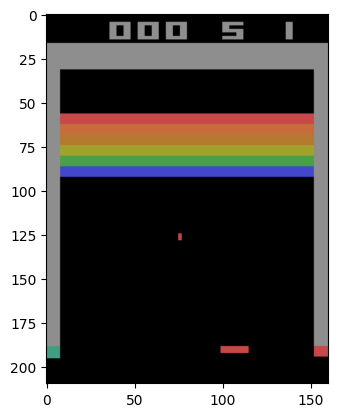

In [4]:
env,state_space,n_actions = get_env_features(ENV_NAME)
env.reset()
obs = env.step(1)[0]

plt.imshow(obs)
plt.show()

## Preprocessing
Image resize and from RGB to greys

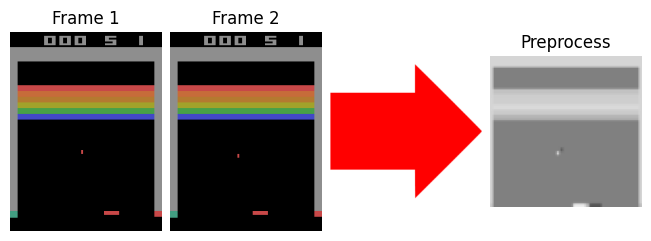

In [5]:
env.reset()
obs = env.step(1)[0]
obs_ = env.step(3)[0]

# setting values to rows and column variables
rows = 1
columns = 4
fig, axs = plt.subplots(rows, columns, constrained_layout=True)

axs[0].set_title('Frame 1')
axs[0].imshow(obs)
axs[0].axis('off')

axs[1].set_title('Frame 2')
axs[1].imshow(obs_)
axs[1].axis('off')

arrow = mpimg.imread('../reports/figures/arrow.png')
axs[2].imshow(arrow)
axs[2].axis('off')

# Preprocess state
state = Transforms.to_gray(obs,obs_)
axs[3].set_title('Preprocess')
axs[3].imshow(state[0], cmap='gray',  vmin=-0.5, vmax=0.5 )
axs[3].axis('off')


plt.savefig(f'../reports/figures/preprocess.png')
plt.show()


# Training

In [2]:
env,state_space,n_actions = get_env_features(ENV_NAME,max_episode_steps=1500)

models = [
    'no_exp',
	'breakout_model_50000',
	'breakout_model_75000',
	'breakout_model_99500']

for model in models:
	agent = DQAgent(replace_target_cnt=1, env=env, state_space=state_space, action_space=n_actions, model_name=model, gamma=GAMMA,eps_strt=EPS_START, eps_end=EPS_END, eps_dec=EPS_DECAY, batch_size=BATCH_SIZE, lr=LR)
	agent.play_games(num_eps=1,render=True)

loaded pretrained model breakout_model_50000
Target network replaced


c:\Users\enric\Documents\GitHub\machine_learning_exam\.venv\lib\site-packages\gymnasium\utils\passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Episode 0/1: 
	Score: 4.0
	Avg score (past 100): 4.0				
	Epsilon: 0.9
	Steps made: 243
loaded pretrained model breakout_model_75000
Target network replaced
Episode 0/1: 
	Score: 50.0
	Avg score (past 100): 50.0				
	Epsilon: 0.9
	Steps made: 1158
loaded pretrained model breakout_model_96900
Target network replaced
Episode 0/1: 
	Score: 106.0
	Avg score (past 100): 106.0				
	Epsilon: 0.9
	Steps made: 1590


: 